In [55]:
import pandas as pd


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [57]:
df = pd.read_csv('/content/students_test.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          98 non-null     int64  
 1   Growth                       98 non-null     float64
 2   Shoe size                    98 non-null     float64
 3   Course number                98 non-null     int64  
 4   Year of birth                98 non-null     int64  
 5   Friend number                98 non-null     int64  
 6   Russian rating               98 non-null     int64  
 7   Maths rating                 98 non-null     int64  
 8   Physics rating               98 non-null     int64  
 9   Computer science rating      98 non-null     int64  
 10  Chemistry rating             98 non-null     int64  
 11  Literature rating            98 non-null     int64  
 12  History rating               98 non-null     int64  
 13  Geography rating      

считаем на обычной линейной регресии

In [59]:
# Разделение данных на признаки (рост) и метки (размер обуви)
X = df[['Growth']]  # Признаки
y = df['Shoe size']  # Метки

In [60]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE) на тестовой выборке:", mse)

Среднеквадратичная ошибка (MSE) на тестовой выборке: 1.5022919153867573


In [61]:
# Предположим, что у вас есть новый рост, для которого нужно предсказать размер обуви
new_height = int(input("введите рост"))  # Пример нового роста в см

# Предсказание размера обуви на основе нового роста
predicted_shoe_size = model.predict([[new_height]])

print("Предсказанный размер обуви для роста", new_height, "см:", predicted_shoe_size[0])


введите рост183
Предсказанный размер обуви для роста 183 см: 42.51260584363479


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Считаем на пукане

In [62]:

!pip install pykan
!pip install -e .

Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [63]:
from kan import *




In [64]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

# Формируем KAN: 1D входы, 1D выходы, 5 скрытых нейронов, кубические сплайны и сетка на 5 точках.



In [65]:
print("Размер обучающей выборки (X_train):", X_train.shape)
print("Размер тестовой выборки (X_test):", X_test.shape)
print("Размер меток обучающей выборки (y_train):", y_train.shape)
print("Размер меток тестовой выборки (y_test):", y_test.shape)


Размер обучающей выборки (X_train): (78, 1)
Размер тестовой выборки (X_test): (20, 1)
Размер меток обучающей выборки (y_train): (78,)
Размер меток тестовой выборки (y_test): (20,)


train loss: 1.08e+00 | test loss: 2.30e+00 | reg: 5.29e+01 : 100%|██| 50/50 [00:24<00:00,  2.02it/s]


Train loss: 1.083149336619091, Test loss: 2.297485369998621


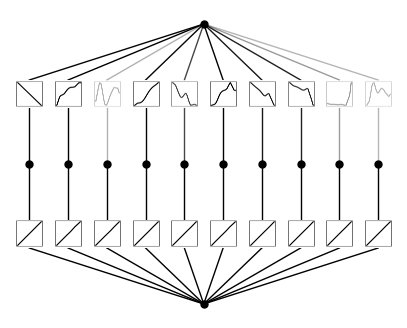

In [88]:

from kan import KAN, create_dataset
from sklearn.model_selection import train_test_split

# Данные
X = df[['Growth']]  # Признаки
y = df['Shoe size']  # Метки

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Преобразование в тензоры PyTorch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Создание правильного датасета для KAN
dataset = {
    'train_input': X_train_tensor,
    'train_label': y_train_tensor,
    'test_input': X_test_tensor,
    'test_label': y_test_tensor
}

# Создание модели KAN с измененными параметрами
model2 = KAN(width=[1, 10, 1], grid=5, k=3, seed=0)




# Обучение модели
#results = model2.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10)
results = model2.train(dataset, opt="LBFGS", steps=50);
# Вывод результатов
train_loss = results['train_loss'][-1]  # последнее значение обучающей ошибки
test_loss = results['test_loss'][-1]  # последнее значение ошибки на тесте
print(f'Train loss: {train_loss}, Test loss: {test_loss}')

# Визуализация результатов, если это возможно
model2.plot()


In [89]:

# Предположим, что у вас есть новый рост, для которого нужно предсказать размер обуви
new_height = int(input("Введите рост: "))  # Пример нового роста в см

# Преобразуем новый рост в тензор PyTorch и добавляем дополнительное измерение
new_height_tensor = torch.tensor([[new_height]], dtype=torch.float32)

# Используем метод forward модели KAN для получения предсказания
predicted_shoe_size = model2(new_height_tensor)

# Вывод предсказанного размера обуви
print("Предсказанный размер обуви для роста", new_height, "см:", predicted_shoe_size.item())  # Используйте .item() для получения скалярного значения из тензора


Введите рост: 183
Предсказанный размер обуви для роста 183 см: 43.036752105619804


/usr/local/lib/python3.10/dist-packages/kan/KAN.py:329: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))


In [90]:
# Для линейной регрессии
linear_predictions = model.predict(X_test)  # Убедитесь, что данные правильно подготовлены

# Для KAN
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)  # Преобразование в тензор, если еще не сделано
kan_predictions = model2(X_test_tensor).detach().numpy()  # Получение предсказаний и преобразование их в NumPy массив


In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Оценка для линейной регрессии
mse_linear = mean_squared_error(y_test, linear_predictions)
mae_linear = mean_absolute_error(y_test, linear_predictions)
r2_linear = r2_score(y_test, linear_predictions)

# Оценка для KAN
mse_kan = mean_squared_error(y_test, kan_predictions)
mae_kan = mean_absolute_error(y_test, kan_predictions)
r2_kan = r2_score(y_test, kan_predictions)

print("Линейная регрессия - MSE:", mse_linear, "MAE:", mae_linear, "R^2:", r2_linear)
print("KAN - MSE:", mse_kan, "MAE:", mae_kan, "R^2:", r2_kan)


Линейная регрессия - MSE: 4.203970759503261 MAE: 1.1541151640471135 R^2: 0.6291926175826449
KAN - MSE: 5.2784390253577 MAE: 1.3310028478965414 R^2: 0.5344201303451084


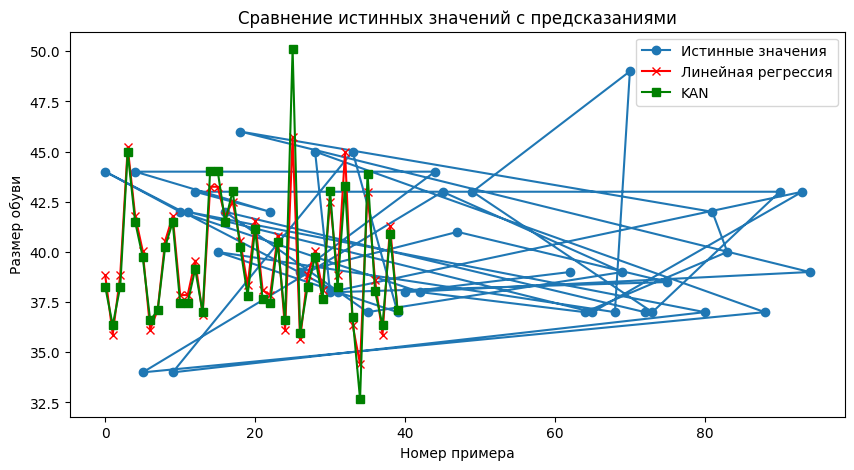

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Истинные значения', marker='o')
plt.plot(linear_predictions, 'r', label='Линейная регрессия', marker='x')
plt.plot(kan_predictions, 'g', label='KAN', marker='s')
plt.title('Сравнение истинных значений с предсказаниями')
plt.xlabel('Номер примера')
plt.ylabel('Размер обуви')
plt.legend()
plt.show()


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Модель с L2 регуляризацией
ridge_model = Ridge(alpha=1.0)  # alpha контролирует силу регуляризации
scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Средняя MSE на кросс-валидации:", -scores.mean())


Средняя MSE на кросс-валидации: 2.7673367121070678
